# Pandas/Numpy Project - Video Games Sales

### Data cleaning step

In [8]:
import pandas as pd
import numpy as np

# Reading CSV file
df = pd.read_csv("./VideoGamesSales.csv")

In [9]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Fixing NULL values for the Region column
df["Region"] = df["Region"].fillna("North")

In [11]:
# Fixing NA_Sales column by using the average value
df["NA_Sales"] = df["NA_Sales"].replace("[$]", "", regex=True)
df["NA_Sales"] = pd.to_numeric(df["NA_Sales"], errors="coerce")
average_sales = df["NA_Sales"].mean()
df["NA_Sales"] = df["NA_Sales"].fillna(average_sales) 

In [ ]:
# Standardizing categorical values in the Country column
df["Country"] = df["Country"].replace({"USA": "United States"})
df["Country"] = df["Country"].str.title()

In [ ]:
# Renaming columns
df = df.rename(columns={"NA_Sales":"National Sales", "Global_Sales":"Global Sales", "NA_Profit": "National Profit", "Global_Profit":"Global Profit"})

In [18]:
# Handling outliers
sales_cap = df["National Sales"].quantile(0.95)
df["National Sales"] = np.where(df["National Sales"] > sales_cap, sales_cap, df["National Sales"])

### Create a bar chart

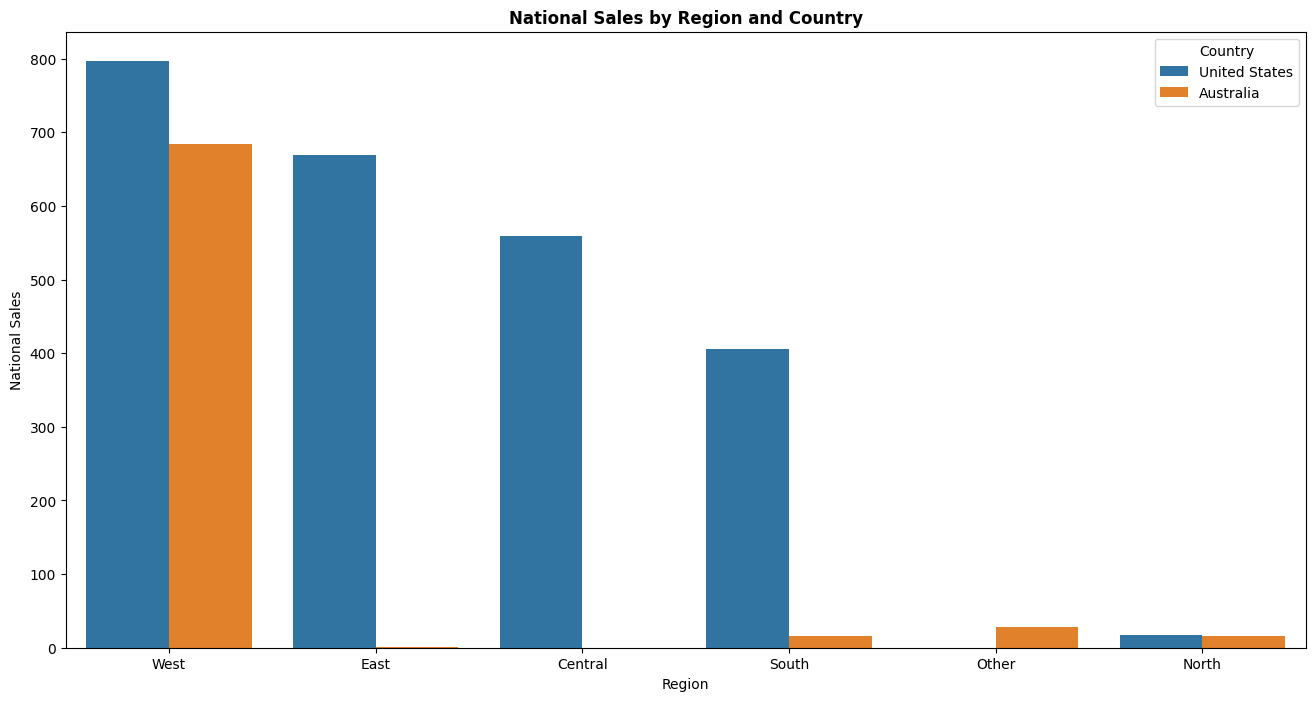

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

national_sales = df.groupby(["Region", "Country"])["National Sales"].sum().reset_index().sort_values(by="National Sales", ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(data=national_sales, x="Region", y="National Sales", hue="Country")

plt.title("National Sales by Region and Country", fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("National Sales", fontweight="bold")

plt.show()

### Create a boxplot

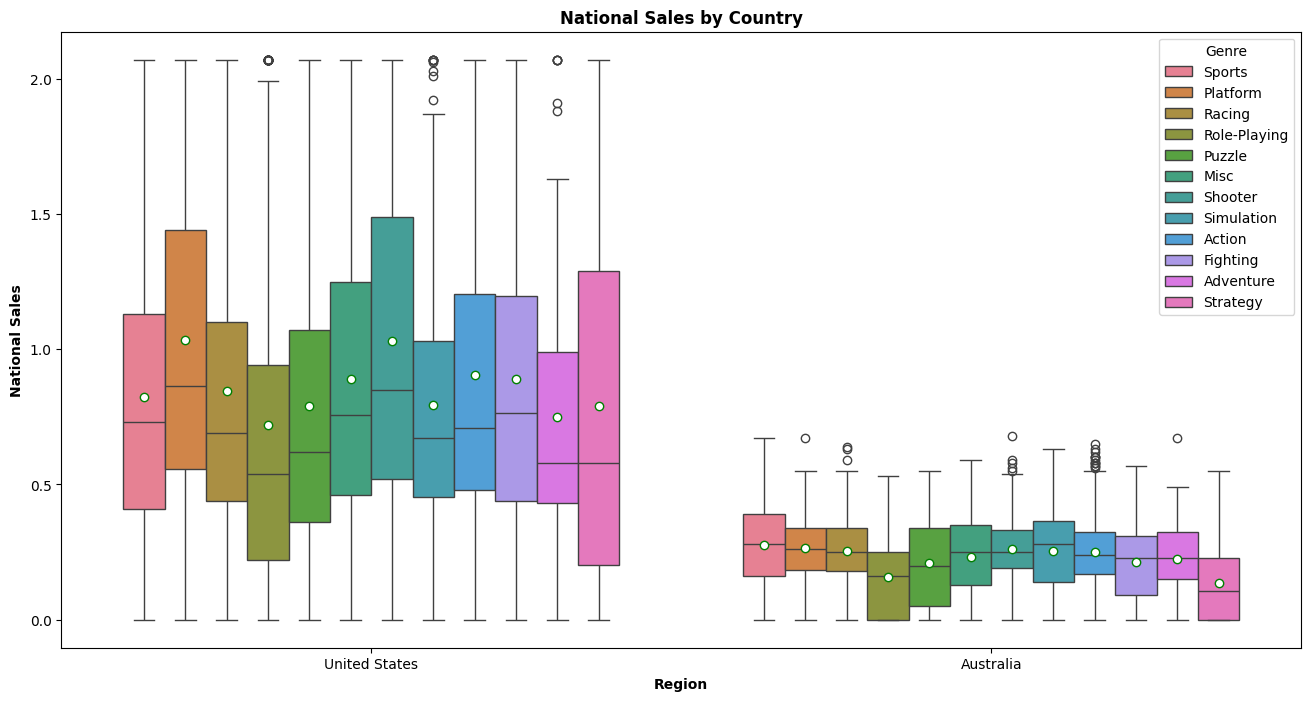

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(x="Country", y="National Sales", data=df, showmeans=True, hue="Genre", meanprops={"marker":"o", 
                                                                                              "markerfacecolor":"white",
                                                                                              "markersize":"6",
                                                                                              "markeredgecolor":"green"})

plt.title("National Sales by Country", fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("National Sales", fontweight="bold")

plt.show()

### Create a pie chart

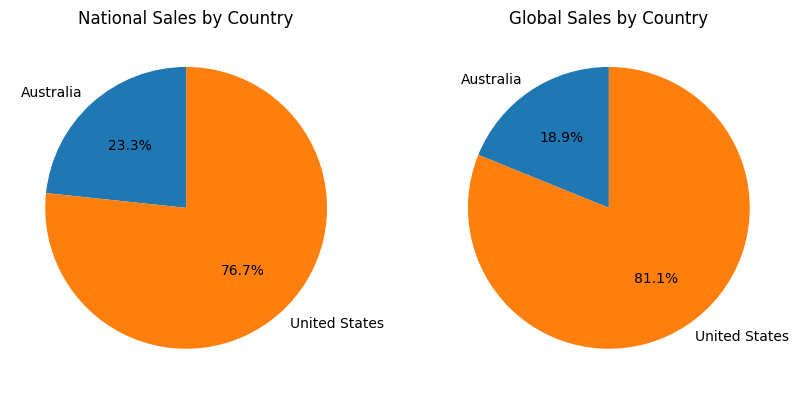

In [35]:
sales = df.groupby(["Country"])[["National Sales", "Global Sales"]].sum().reset_index()
country = sales["Country"]
national_sales=sales["National Sales"]
global_sales = sales["Global Sales"]

fig, axs = plt.subplots(1, 2, figsize=(10,7))

axs[0].pie(national_sales, labels=country, autopct="%1.1f%%", startangle=90)
axs[0].set_title("National Sales by Country")

axs[1].pie(global_sales, labels=country, autopct="%1.1f%%", startangle=90)
axs[1].set_title("Global Sales by Country")

plt.show()